In [59]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

Here I am experimenting with bootstrapping by taking the Average Medicare Payments of one procedure (039 - EXTRACRANIAL PROCEDURES W/O CC/MCC) and seeing how bootstrapping different sample sizes can affect the results. 

In [60]:
df = pd.read_csv('US Hospital Records.csv')
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44


In [68]:
df1 = df[df['DRG Definition'] == '039 - EXTRACRANIAL PROCEDURES W/O CC/MCC']
df1 = df1[['DRG Definition', ' Average Total Payments ']]
df1.rename(columns={
    ' Average Total Payments ': 'ATP'
}, inplace =True)
df1.head()

,DRG Definition,ATP
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,5777.24
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,5787.57
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,5434.95
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,5417.56
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,5658.33


In [62]:
df1.ATP.mean()

6960.534003707136

From this point I will be performing two bootstrapping operations, the only difference being in the size of the resampling being done. In the first one, below, I resample the entire length of the ATP column, then append the mean to results and do a common bootstrap. In the second, I only set a resample size of 50 and then perform a common bootstrap. The main difference at the end is the confidence interval endpoints of the means, with the higher resample size the endpoints were much closer together (6800 and 7000), giving a more accurate result. The smaller resample size had a far greater range between the endpoints (6600 and 7300). The medians of both were quite close together, being in the mid 6900s. 

In [63]:
results = []
for i in range(1000):
    sample = np.random.choice(df1.ATP, replace=True, size=len(df1.ATP))
    results.append(sample.mean())

results = pd.Series(results)
results


0      6995.752929
1      6938.122929
2      6991.024727
3      6934.190445
4      6990.101316
          ...     
995    6902.763290
996    6969.788434
997    6867.725690
998    6970.798035
999    6959.894328
Length: 1000, dtype: float64

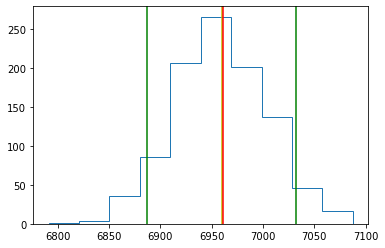

6887.322687673773
7032.174778035217
6959.805759962928


In [64]:
plt.hist(results, histtype='step')
plt.axvline(results.median(), color='y')
plt.axvline(df1.ATP.mean(), color='r')
plt.axvline(np.percentile(results, 5), color='g')
plt.axvline(np.percentile(results, 95), color='g')
plt.show()

print(np.percentile(results, 5))
print(np.percentile(results, 95))
print(results.median())

In [70]:
results = []
for i in range(1000):
    sample = np.random.choice(df1.ATP, replace=True, size=50)
    results.append(sample.mean())

results = pd.Series(results)
results

0      6707.2430
1      6821.1886
2      7150.7456
3      6803.7994
4      7296.5612
         ...    
995    6677.6288
996    6518.3548
997    6860.8556
998    6845.2136
999    6964.4402
Length: 1000, dtype: float64

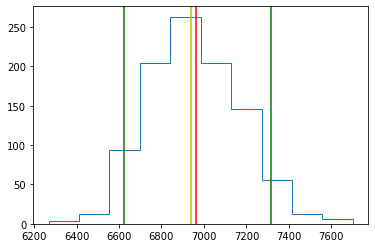

6624.97438
7315.74096
6940.6814


In [66]:
plt.hist(results, histtype='step')
plt.axvline(results.median(), color='y')
plt.axvline(df1.ATP.mean(), color='r')
plt.axvline(np.percentile(results, 5), color='g')
plt.axvline(np.percentile(results, 95), color='g')
plt.show()
print(np.percentile(results, 5))
print(np.percentile(results, 95))
print(results.median())